<a href="https://colab.research.google.com/github/ritik3000/Image_vectors/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Deconvolution2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import Model, load_model
from keras.datasets import mnist
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers
from keras import optimizers
from keras import backend as K
import scipy
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [ ]:
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)
encoder=Model(input_layer,latent_view)

model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')



In [ ]:
from keras.models import *


# returns a compiled model
# identical to the previous one


In [ ]:
encoder.load_weights('/content/drive/My Drive/encoder.h5')

In [ ]:
H=28
W=28

In [ ]:
import cv2
def isgray(imgpath):
    img = cv2.imread(imgpath)
    if len(img.shape) < 3: return True
    if img.shape[2]  == 1: return True
    b,g,r = img[:,:,0], img[:,:,1], img[:,:,2]
    if (b==g).all() and (b==r).all(): return False
    return True
import os
import cv2
rootdir = '/content/drive/My Drive/images_tyroo'
adresses=[]

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if isgray(os.path.join(subdir, file)):
          adresses.append(os.path.join(subdir, file))


In [ ]:

def get_input(path):
    img = cv2.imread(path,0)
    print(img.shape)
    #display(img, 'original')
    img = rm_bg(img)
    #display(img, 'fore')
    img = img / 8.0
    img = img.astype(np.uint8)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (W, H))
    img = img.astype('float')
    img = img/255
    return img.reshape((H, W, 1))
def rm_bg(img):
    pixels = img[0:10, 0:10]
    avg = np.mean(pixels)
    img[(img > int(avg * 0.95)) & (img < int(avg * 1.05))] = 0
    return img

In [ ]:
images_1=[]
for i in range(0,len(adresses)):
  images_1.append(get_input(adresses[i]))

(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)
(400, 300)

In [ ]:
len(adresses)

998

In [ ]:
x_train = np.array(images_1).reshape(-1, 28, 28) / 255.0

In [ ]:
x_train=x_train.reshape(998,784)

In [ ]:
y=encoder.predict(x_train)

In [ ]:
y

array([[0.51822054, 0.40520504, 0.4826741 , ..., 0.4254179 , 0.48720247,
        0.4129996 ],
       [0.518007  , 0.40546513, 0.48272496, ..., 0.42570806, 0.48732638,
        0.41316783],
       [0.5177978 , 0.40642214, 0.48242334, ..., 0.42651278, 0.4873124 ,
        0.41352183],
       ...,
       [0.51808774, 0.4054251 , 0.4827179 , ..., 0.42554936, 0.48728248,
        0.4130973 ],
       [0.5179781 , 0.40517226, 0.4826845 , ..., 0.42556822, 0.48727956,
        0.4130407 ],
       [0.51776713, 0.40645236, 0.48244628, ..., 0.42653582, 0.48730695,
        0.4135631 ]], dtype=float32)

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=20, algorithm='ball_tree').fit(y) 



In [ ]:
distances, indices = nbrs.kneighbors(y)

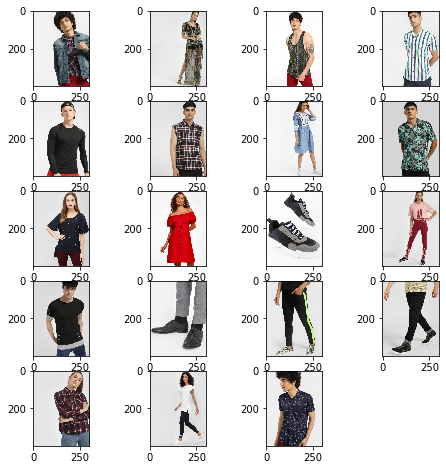

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1,len(indices[0])):
    img = mpimg.imread(adresses[indices[0][i-1]]) 
    fig.add_subplot(rows, columns,i)
    plt.imshow(img)
plt.show()

In [ ]:
#ENCODER
inp = Input((28,28,1))
e = Conv2D(32, (3, 3), activation='relu')(inp)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(64, (3, 3), activation='relu')(e)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(64, (3, 3), activation='relu')(e)
l = Flatten()(e)
l = Dense(49, activation='softmax')(l)
#DECODER
d = Reshape((7,7,1))(l)
d = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(d)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d)
encoder=Model(inp,l)
ae = Model(inp, decoded)
ae.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0   

In [ ]:
encoder.load_weights('/content/drive/My Drive/encoder_f')

In [ ]:
x_train = np.array(images_1).reshape(-1, 28, 28) / 255.0

In [ ]:
x_train.shape

(998, 28, 28)

In [ ]:
x_train=x_train.reshape(998,28,28,1)

In [ ]:
y=encoder.predict(x_train)

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=20, algorithm='ball_tree').fit(y) 



In [ ]:
distances, indices = nbrs.kneighbors(y)

In [ ]:
indices[0]

array([  0, 294, 164,  27, 461, 715, 765, 450, 242, 662, 233, 548, 525,
       271, 901, 427, 572, 637, 791,   5])

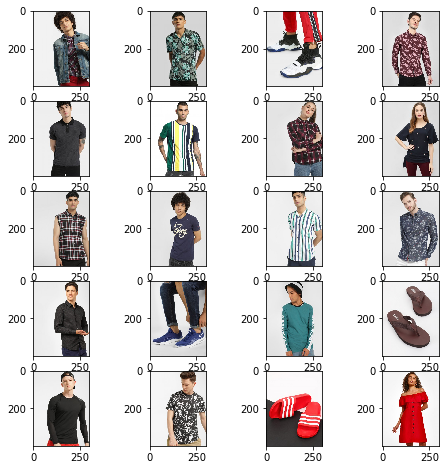

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1,len(indices[0])+1):
    img = mpimg.imread(adresses[indices[0][i-1]]) 
    fig.add_subplot(rows, columns,i)
    plt.imshow(img)
plt.show()